## URL dos dados
https://dados.gov.br/dados/conjuntos-dados/preco-de-medicamentos-no-brasil-consumidor

# 4. Diagrama ER

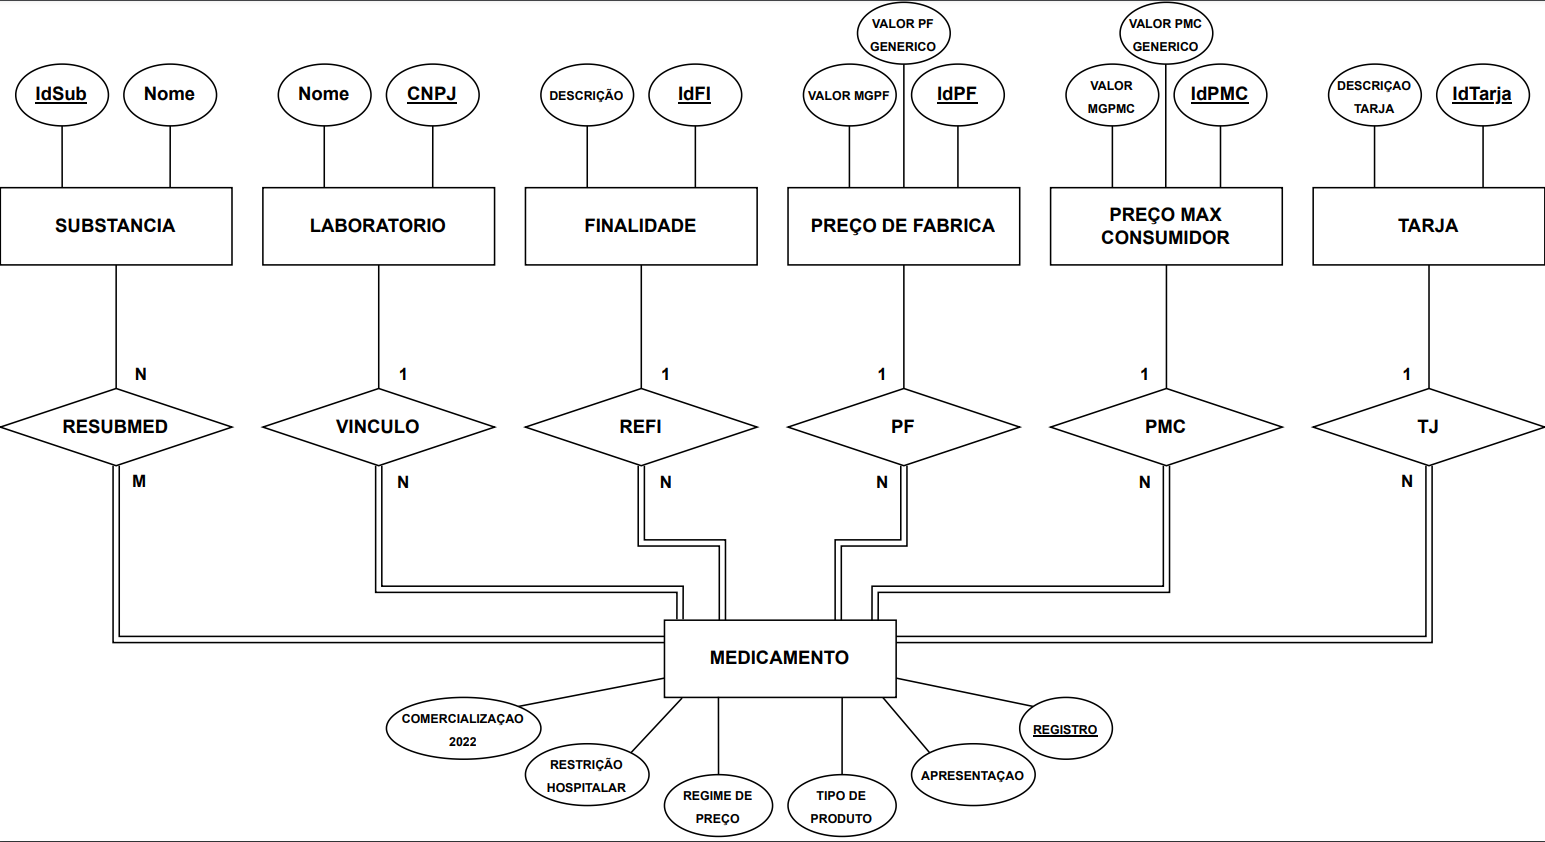

# 5. Diagrama relacional

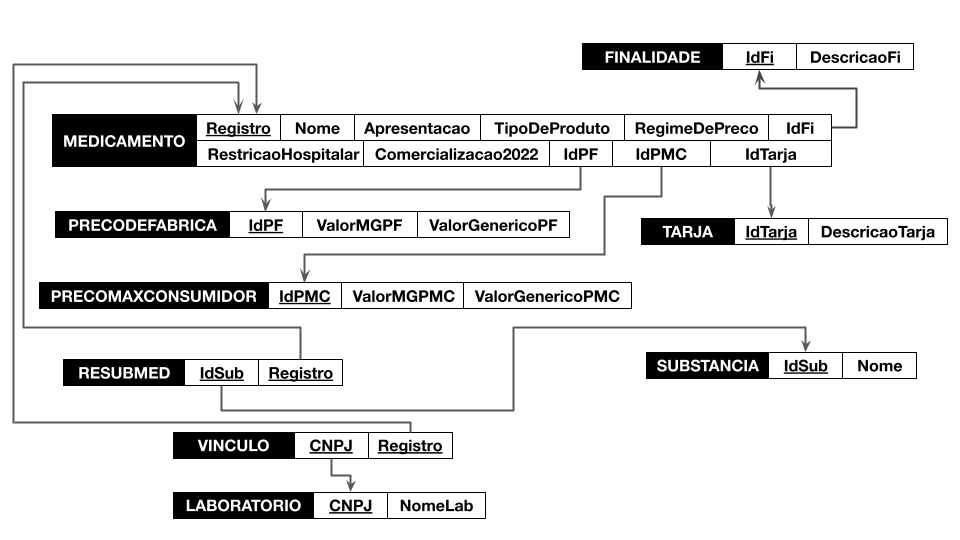

# Para mais informações visar o readme

# Carregar os dados

In [2]:
#importar bibliotecas
import pandas as pd
import numpy as np
import sqlite3
import csv

Para pegar somento os dados

In [4]:
dados_raw = pd.read_csv("tabela_original.csv", encoding= "utf-8")
dados_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27682 entries, 0 to 27681
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   SUBSTÂNCIA                           27682 non-null  object
 1   CNPJ                                 27682 non-null  object
 2   LABORATÓRIO                          27682 non-null  object
 3   REGISTRO                             27682 non-null  int64 
 4   PRODUTO                              27682 non-null  object
 5   APRESENTAÇÃO                         27682 non-null  object
 6   CLASSE TERAPÊUTICA                   27678 non-null  object
 7   TIPO DE PRODUTO (STATUS DO PRODUTO)  27678 non-null  object
 8   REGIME DE PREÇO                      27678 non-null  object
 9   PF 12%                               26831 non-null  object
 10  PF 18%                               26831 non-null  object
 11  PMC 12%                              2276

# Transformação

A ideia vai ser separar todos os dados importantes em arquivos csv tal que cada arquivo será uma tabela.

Remove-se todas as linhas que apresentam pelo menos 1 valor nulo nas colunas definidas em subset, como mostrado nas linhas de comando. O motivo pelo qual se eliminam as linhas supracitadas está de acordo com o fato de que informações nulas nelas irão prejudicar as queries e não fazem sentido lógico estarem nulas. Adicionalmente, ressalta-se que no dicionário fornecido associado ao conjunto de dados, nada se explica sobre o significado de nulos nessas colunas em subset, possivelmente o medicamento ainda está sob testes ou problemas na inserção dos dados.

In [5]:
dados = dados_raw.dropna(subset = ["CLASSE TERAPÊUTICA", "TIPO DE PRODUTO (STATUS DO PRODUTO)", "REGIME DE PREÇO", "PF 12%", "PF 18%",
                                   "RESTRIÇÃO HOSPITALAR", "COMERCIALIZAÇÃO 2022", "TARJA"] )
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26831 entries, 0 to 27676
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   SUBSTÂNCIA                           26831 non-null  object
 1   CNPJ                                 26831 non-null  object
 2   LABORATÓRIO                          26831 non-null  object
 3   REGISTRO                             26831 non-null  int64 
 4   PRODUTO                              26831 non-null  object
 5   APRESENTAÇÃO                         26831 non-null  object
 6   CLASSE TERAPÊUTICA                   26831 non-null  object
 7   TIPO DE PRODUTO (STATUS DO PRODUTO)  26831 non-null  object
 8   REGIME DE PREÇO                      26831 non-null  object
 9   PF 12%                               26831 non-null  object
 10  PF 18%                               26831 non-null  object
 11  PMC 12%                              22767 non

In [6]:
#como iremos fazer o registro como chave para a tabela medicamentos vamos checar se a duplicatas
print(dados.REGISTRO.unique().shape)

(26827,)


In [7]:
#como tem 4 duplicatas vamos retirar elas
dados = dados.drop_duplicates(subset=["REGISTRO"])
dados

,SUBSTÂNCIA,CNPJ,LABORATÓRIO,REGISTRO,PRODUTO,APRESENTAÇÃO,CLASSE TERAPÊUTICA,TIPO DE PRODUTO (STATUS DO PRODUTO),REGIME DE PREÇO,PF 12%,PF 18%,PMC 12%,PMC 18%,RESTRIÇÃO HOSPITALAR,COMERCIALIZAÇÃO 2022,TARJA
0,SALICILATO DE FENILA;ÁCIDO SALICÍLICO;ÓXIDO DE...,33.379.884/0001-96,LABORATORIO SIMOES LTDA.,57600510011,TALCO ALÍVIO,TALQUEIRA C/ 100 G,D10A - ANTIACNEICOS TÓPICOS,Similar,Regulado,"6,53","7,08","8,72","9,43",Não,Não,Tarja Preta (**)
1,DIENOGESTE;VALERATO DE ESTRADIOL,56.990.534/0001-67,SCHERING DO BRASIL QUÍMICA E FARMACÊUTICA LTDA,1002001390025,CHARMELIE,COM REV A + COM REV B + COM REV C + COM REV D ...,G3A4 - PREPARAÇÕES CONTRACEPTIVAS TRIFÁSICAS,-,Regulado,"138,97","150,7","185,63","200,78",Não,Não,Tarja Vermelha
2,MONTELUCASTE,45.987.013/0001-34,ORGANON FARMACÊUTICA LTDA.,1002900050014,SINGULAIR,5 MG COM MAST CT 3 BL AL PLAS INC X 10,R3J2 - ANTIASMÁTICOS/DPOC ANTILEUCOTRIENOS SIS...,Novo,Regulado,"56,28","60,4","77,8","83,5",Não,Sim,Tarja Vermelha (**)
3,MONTELUCASTE,45.987.013/0001-34,ORGANON FARMACÊUTICA LTDA.,1002900050022,SINGULAIR,10 MG COM REV CT 3 BL AL PLAS INC X 10,R3J2 - ANTIASMÁTICOS/DPOC ANTILEUCOTRIENOS SIS...,Novo,Regulado,"56,28","60,4","77,8","83,5",Não,Sim,Tarja Vermelha (**)
4,MONTELUCASTE,45.987.013/0001-34,ORGANON FARMACÊUTICA LTDA.,1002900050057,SINGULAIR,4 MG COM MAST CT BL AL PLAS INC X 10,R3J2 - ANTIASMÁTICOS/DPOC ANTILEUCOTRIENOS SIS...,Novo,Regulado,"37,84","40,61","52,31","56,14",Não,Não,Tarja Vermelha (**)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27671,VENETOCLAX,15.800.545/0001-50,ABBVIE FARMACÊUTICA LTDA.,1986000140031,VENCLEXTA,100 MG COM REV CX BL AL PLAS TRANS X 14 + 100 ...,L1X9 - TODOS OS OUTROS ANTINEOPLÁSICOS,Novo,Regulado,"8734,48","9471,6","11667,38","12619,09",Não,Sim,Tarja Vermelha
27672,VENETOCLAX,15.800.545/0001-50,ABBVIE FARMACÊUTICA LTDA.,1986000140041,VENCLEXTA,50 MG COM REV CT BL AL PLAS TRANS X 7,L1X9 - TODOS OS OUTROS ANTINEOPLÁSICOS,Novo,Regulado,"1180,2","1279,8","1576,49","1705,09",Não,Sim,Tarja Vermelha
27674,RISANQUIZUMABE,15.800.545/0001-50,ABBVIE FARMACÊUTICA LTDA.,1986000160016,SKYRIZI,75 MG SOL INJ CT 2 BL X SER PREENC VD TRANS X ...,L4C - INIBIDORES DA INTERLEUCINA,Biológico,Regulado,"18966,43","20567,06","25335,05","27401,67",Não,Sim,Tarja Vermelha
27675,UPADACITINIBE HEMI-HIDRATADO,15.800.545/0001-50,ABBVIE FARMACÊUTICA LTDA.,1986000170011,RINVOQ,15 MG COM REV LIB PROL CT FR PLAS PEAD OPC X 30,M1C - AGENTES ANTI-REUMÁTICOS ESPECÍFICOS,Novo,Regulado,"5007,51","5430,11","6688,95","7234,58",Não,Sim,Tarja Vermelha


In [88]:
dados.to_csv("./Arquivos_aux/tabela_limpa.csv", encoding= "utf-8", index= False)

Arquivo da tabela Laboratorios

In [17]:
laboratorios = dados.drop_duplicates(subset=["CNPJ", "LABORATÓRIO"]).iloc[:,1:3].reset_index(drop = True)
print(laboratorios.shape)
#mudar nome de coluna
laboratorios.rename(columns= { "LABORATÓRIO": "NomeLab"}, inplace= True)
laboratorios.to_csv("./Arquivos_Intermediarios/lab.csv", encoding= "utf-8", index= False)

(264, 2)


Arquivo da tabela Finalidade

In [19]:
classe_tera = dados.drop_duplicates(subset=["CLASSE TERAPÊUTICA"]).iloc[:,6].reset_index(drop = True)
print(classe_tera.shape)
separado = pd.Series(classe_tera.values).str.split(pat = " - ", n =1 , expand = True)
print(separado)
#mudar nome
separado.rename(columns= { 0: "IdFi", 1:"DescricaoFi"}, inplace= True)
separado.to_csv("./Arquivos_Intermediarios/finalidade.csv", encoding= "utf-8", index= False)

(520,)
         0                                                  1
0     D10A                               ANTIACNEICOS TÓPICOS
1     G3A4              PREPARAÇÕES CONTRACEPTIVAS TRIFÁSICAS
2     R3J2     ANTIASMÁTICOS/DPOC ANTILEUCOTRIENOS SISTÊMICOS
3      C9C              ANTAGONISTAS DA ANGIOTENSINA II PUROS
4    C10A1          ESTATINAS, INIBIDORES DA REDUTASE HMG-CoA
..     ...                                                ...
515    T1F                     PRODUTOS PARA ULTRA-SONOGRAFIA
516  J07A1                      VACINA PARA GRIPE (INFLUENZA)
517   J7D4            VACINA PARA FEBRE TIFÓIDE E PARATIFÓIDE
518   C3A4  AGENTES DIURÉTICOS POUPADORES DE POTÁSSIO ASSO...
519  A10X9             OUTROS MEDICAMENTOS USADOS EM DIABETES

[520 rows x 2 columns]


Arquivo da tabela Tarja

In [76]:
tarja = dados.drop_duplicates(subset=["TARJA"]).iloc[:,15].reset_index(drop = True)
tarja.rename("DescricaoTarja",inplace=True)
tarja.to_csv("./Arquivos_aux/tarja_aux.csv", encoding= "utf-8", index= True, index_label= "IdTarja")
tarja

0                Tarja Preta (**)
1                  Tarja Vermelha
2             Tarja Vermelha (**)
3    Tarja Vermelha sob restrição
4                 Tarja Sem Tarja
5                          - (*) 
6                     Tarja Preta
Name: DescricaoTarja, dtype: object

De acordo com o dicionário referente ao conjunto de dados, não foram encontradas definições a respeito do ** associados a classificação preta, vermelha ou -. Soma-se ainda, ausência de explicação sobre o - e vermelha sob restrição. Posteriormente, a partir de buscas na Internet utilizando queries que contemplassem os termos "tarja preta **", "tarja vermelha **", "classificações tarjas medicamentos" e outros, não foi possível encontrar informações suficientes a fim de compreender a classificação feita pelo conjunto de dados fornecidos pelo governo. Nesse sentido, mesmo identificado a partir das buscas que existem possíveis subcategorias para algumas das tarjas, como não é delineado o que se refere à que pela ausência de legenda sob os **, delineou-se que haveriam apenas três tipo de classificações para tarja, quais sejam: (i) preta; (ii) vermelha; e (iii) sem. Portanto, definiu-se que toda variação de tarja preta, seria tarja preta, toda variação de tarja vermelha seria agrupada em vermelha apenas e aquelas com - seriam definidas como sem. A nova tabela sera chamada Tarja_final cuja imagem pode ser vista como:

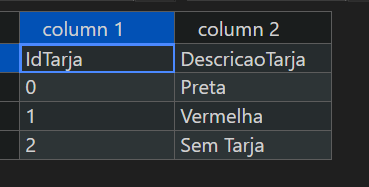

In [23]:
dc = {"IdTarja": [0,1,2] , "DescricaoTarja":["Preta", "Vermelha", "Sem Tarja"] }
tarja = pd.DataFrame(dc)
tarja.to_csv("./Arquivos_Intermediarios/tarja.csv", encoding= "utf-8", index= False)
tarja

,IdTarja,DescricaoTarja
0,0,Preta
1,1,Vermelha
2,2,Sem Tarja


Arquivo da tabela Preco de Fabrica

In [31]:
pf = dados.drop_duplicates(subset=["PF 12%", "PF 18%"]).iloc[:,9:11].reset_index(drop = True)
pf.shape
#mudar nome
pf.rename(columns= {"PF 12%": "ValorGenericoPF", "PF 18%":"ValorMGPF"}, inplace= True)
pf.to_csv("./Arquivos_Intermediarios/pf.csv", encoding= "utf-8", index= True, index_label= "IdPF")

Arquivo da tabela Preço Máximo de Compra

In [33]:
pmc = dados.drop_duplicates(subset=["PMC 12%", "PMC 18%"]).iloc[:,11:13].reset_index(drop = True)
#mudar nome
pmc.rename(columns= {"PMC 12%":"ValorGenericoPMC", "PMC 18%": "ValorMGPMC" }, inplace= True)
pmc.to_csv("./Arquivos_Intermediarios/pmc.csv", encoding= "utf-8", index= True,index_label="IdPMC" , na_rep = "NULL")
pmc.shape

(13272, 2)

Arquivo da tabela Substancia

In [48]:
#retirar as coisas repetidas
df = dados.drop_duplicates(subset=["SUBSTÂNCIA"]).iloc[:,0].reset_index(drop = True)
df.to_csv("./Arquivos_aux/substancia.csv", encoding= "utf-8", index= True)
df

0       SALICILATO DE FENILA;ÁCIDO SALICÍLICO;ÓXIDO DE...
1                        DIENOGESTE;VALERATO DE ESTRADIOL
2                                            MONTELUCASTE
3                                     LOSARTANA POTÁSSICA
4                                            SINVASTATINA
                              ...                        
2233                                            RITONAVIR
2234                   PIBRENTASVIR;GLECAPREVIR HIDRATADO
2235                                           VENETOCLAX
2236                                       RISANQUIZUMABE
2237                         UPADACITINIBE HEMI-HIDRATADO
Name: SUBSTÂNCIA, Length: 2238, dtype: object

In [50]:
#tem linhas com mais de um valor, vamos coloca-las em uma linha separada
df = pd.read_csv("./Arquivos_aux/substancia.csv", delimiter=',')
new_rows = [] 

for index, row in df.iterrows():
    substances = row[1].split(';')  

    for substance in substances:
        new_row = [row[0], substance]
        new_rows.append(new_row)


new_df = pd.DataFrame(new_rows, columns=['IdSub', 'NomeSub'])
# salvar
new_df.to_csv('./Arquivos_aux/updated_substancia.csv', index=False)

In [52]:
#pegar a tabela com substancia ja todas separadas e reorganizar
sub_tudo_separado = pd.read_csv("./Arquivos_aux/updated_substancia.csv")
sub_tudo_separado

,IdSub,NomeSub
0,0,SALICILATO DE FENILA
1,0,ÁCIDO SALICÍLICO
2,0,ÓXIDO DE ZINCO
3,0,ENXOFRE
4,0,MENTOL
...,...,...
4559,2234,PIBRENTASVIR
4560,2234,GLECAPREVIR HIDRATADO
4561,2235,VENETOCLAX
4562,2236,RISANQUIZUMABE


In [54]:
#retirar duplicatas
sub_final = sub_tudo_separado.drop_duplicates(subset=[ "NomeSub" ]).reset_index(drop = True)
sub_final.shape
#retirar coluna
sub_final.drop(["IdSub"], axis = 1, inplace= True)
sub_final.shape
sub_final.to_csv("./Arquivos_Intermediarios/substancia_final.csv", encoding= "utf-8", index= True, index_label= "IdSub")

Arquivo da tabela Medicamento

In [58]:
dados.shape

(26827, 16)

In [60]:
#juntar com pf
pf = pd.read_csv("./Arquivos_Intermediarios/pf.csv")
juntar_med_idPF = dados.merge(pf, left_on=[ "PF 12%", "PF 18%"], right_on = [ "ValorGenericoPF","ValorMGPF",])
juntar_med_idPF.shape

(26827, 19)

In [61]:
#juntar com pmc
pmc = pd.read_csv("./Arquivos_Intermediarios/pmc.csv")
juntar_2 = juntar_med_idPF.merge(pmc,how = "inner", left_on=[ "PMC 12%","PMC 18%" ], right_on = ["ValorGenericoPMC","ValorMGPMC"])
juntar_2.shape

(26827, 22)

In [77]:
#juntar com idTarja
tarja = pd.read_csv("./Arquivos_aux/tarja_aux.csv")
juntar_3 = juntar_2.merge(tarja,how = "inner", left_on=["TARJA"], right_on = ["DescricaoTarja"])
juntar_3.shape

(26827, 24)

In [78]:
#juntar com idfi, neste caso basta separar
classe_tera = dados.drop_duplicates(subset=["CLASSE TERAPÊUTICA"]).iloc[:,6].reset_index(drop = True)
aux_fi = pd.DataFrame( classe_tera.values, columns= ["DescricaoFi"])
juntar_4 = juntar_3.merge(aux_fi,how = "inner", left_on=["CLASSE TERAPÊUTICA" ], right_on = ["DescricaoFi"])
separado = pd.Series(juntar_4.DescricaoFi.values).str.split(pat = " - ", n =1 , expand = True)
separado.rename(columns= { 0: "IdFI", 1: "DescricaoFi"}, inplace= True)
juntar_4 = pd.concat([ juntar_4[["REGISTRO", "PRODUTO", "APRESENTAÇÃO", "TIPO DE PRODUTO (STATUS DO PRODUTO)", "REGIME DE PREÇO",
                                "RESTRIÇÃO HOSPITALAR","COMERCIALIZAÇÃO 2022", "IdPF", "IdPMC", "IdTarja"]],
                                separado ], axis = 1)
juntar_4

,REGISTRO,PRODUTO,APRESENTAÇÃO,TIPO DE PRODUTO (STATUS DO PRODUTO),REGIME DE PREÇO,RESTRIÇÃO HOSPITALAR,COMERCIALIZAÇÃO 2022,IdPF,IdPMC,IdTarja,IdFI,DescricaoFi
0,57600510011,TALCO ALÍVIO,TALQUEIRA C/ 100 G,Similar,Regulado,Não,Não,0,0,0,D10A,ANTIACNEICOS TÓPICOS
1,1058306780043,DERMAZELAIC,150 MG/G GEL CT BG AL X 30G,Similar,Liberado,Não,Não,3077,2542,0,D10A,ANTIACNEICOS TÓPICOS
2,1017400460017,ACNASE GEL,50 MG/G GEL CT BG AL X 20 G,Similar,Liberado,Não,Sim,3193,2642,0,D10A,ANTIACNEICOS TÓPICOS
3,1067500440065,SOLUGEL,80 MG/G GEL CT BG PLAS LAM X 15 G,Novo,Liberado,Não,Não,8908,7440,0,D10A,ANTIACNEICOS TÓPICOS
4,1291600070028,ROZEX,"7,5 MG/G GEL CT BG AL X 30 G",Novo,Liberado,Não,Sim,12541,10242,0,D10A,ANTIACNEICOS TÓPICOS
...,...,...,...,...,...,...,...,...,...,...,...,...
26822,1781709080030,ALBOCRESIL,90 MG OVL CT 01 STRIP PLAS PVC/PE OPC X 6,Novo,Liberado,Não,Não,8680,7282,4,G1D,ANTISSÉPTICOS GINECOLÓGICOS
26823,1063900970026,NENE DENT N,"(150,0 + 3,40 + 3,20) MG/G GEL CT BG AL X 10 G",Novo,Liberado,Não,Sim,8681,7283,4,A1A,ESTOMATOLÓGICOS
26824,1781709050026,NENE DENT N,"(150,0 + 3,40 + 3,20) MG/G GEL CT BG AL X 10 G",Novo,Liberado,Não,Sim,8681,7283,4,A1A,ESTOMATOLÓGICOS
26825,1063900970034,NENE DENT N,"(150,0 + 3,40 + 3,20) MG/G SOL CT FR PLAS AMB...",Novo,Liberado,Não,Sim,8682,7284,4,A1A,ESTOMATOLÓGICOS


In [79]:
#mudar as tarjas
juntar_4["newtarja"] = np.where(juntar_4.IdTarja == 6, 0, juntar_4.IdTarja)
juntar_4["newtarja"] = np.where(juntar_4.IdTarja == 2  , 1, juntar_4.newtarja)
juntar_4["newtarja"] = np.where(juntar_4.IdTarja == 3  , 1, juntar_4.newtarja)
juntar_4["newtarja"] = np.where(juntar_4.IdTarja == 4  , 2, juntar_4.newtarja)
juntar_4["newtarja"] = np.where(juntar_4.IdTarja == 5  , 2, juntar_4.newtarja)
juntar_4.newtarja.value_counts()

newtarja
1    21591
2     3544
0     1692
Name: count, dtype: int64

In [80]:
#retirar colunas desnecessaria
juntar_4.drop(["IdTarja", "DescricaoFi"], axis=1, inplace= True)
juntar_4

,REGISTRO,PRODUTO,APRESENTAÇÃO,TIPO DE PRODUTO (STATUS DO PRODUTO),REGIME DE PREÇO,RESTRIÇÃO HOSPITALAR,COMERCIALIZAÇÃO 2022,IdPF,IdPMC,IdFI,newtarja
0,57600510011,TALCO ALÍVIO,TALQUEIRA C/ 100 G,Similar,Regulado,Não,Não,0,0,D10A,0
1,1058306780043,DERMAZELAIC,150 MG/G GEL CT BG AL X 30G,Similar,Liberado,Não,Não,3077,2542,D10A,0
2,1017400460017,ACNASE GEL,50 MG/G GEL CT BG AL X 20 G,Similar,Liberado,Não,Sim,3193,2642,D10A,0
3,1067500440065,SOLUGEL,80 MG/G GEL CT BG PLAS LAM X 15 G,Novo,Liberado,Não,Não,8908,7440,D10A,0
4,1291600070028,ROZEX,"7,5 MG/G GEL CT BG AL X 30 G",Novo,Liberado,Não,Sim,12541,10242,D10A,0
...,...,...,...,...,...,...,...,...,...,...,...
26822,1781709080030,ALBOCRESIL,90 MG OVL CT 01 STRIP PLAS PVC/PE OPC X 6,Novo,Liberado,Não,Não,8680,7282,G1D,2
26823,1063900970026,NENE DENT N,"(150,0 + 3,40 + 3,20) MG/G GEL CT BG AL X 10 G",Novo,Liberado,Não,Sim,8681,7283,A1A,2
26824,1781709050026,NENE DENT N,"(150,0 + 3,40 + 3,20) MG/G GEL CT BG AL X 10 G",Novo,Liberado,Não,Sim,8681,7283,A1A,2
26825,1063900970034,NENE DENT N,"(150,0 + 3,40 + 3,20) MG/G SOL CT FR PLAS AMB...",Novo,Liberado,Não,Sim,8682,7284,A1A,2


In [81]:
#renomear as colunas
juntar_4.rename(columns={"REGISTRO": "Registro", "PRODUTO": "Nome", "APRESENTAÇÃO": "Apresentacao", "TIPO DE PRODUTO (STATUS DO PRODUTO)": "TipoDeProduto",
                         "REGIME DE PREÇO": "RegimeDePreco","RESTRIÇÃO HOSPITALAR": "RestricaoHospitalar",
                          "COMERCIALIZAÇÃO 2022": "Comercializacao2022", "newtarja": "IdTarja" }, inplace= True)
juntar_4

,Registro,Nome,Apresentacao,TipoDeProduto,RegimeDePreco,RestricaoHospitalar,Comercializacao2022,IdPF,IdPMC,IdFI,IdTarja
0,57600510011,TALCO ALÍVIO,TALQUEIRA C/ 100 G,Similar,Regulado,Não,Não,0,0,D10A,0
1,1058306780043,DERMAZELAIC,150 MG/G GEL CT BG AL X 30G,Similar,Liberado,Não,Não,3077,2542,D10A,0
2,1017400460017,ACNASE GEL,50 MG/G GEL CT BG AL X 20 G,Similar,Liberado,Não,Sim,3193,2642,D10A,0
3,1067500440065,SOLUGEL,80 MG/G GEL CT BG PLAS LAM X 15 G,Novo,Liberado,Não,Não,8908,7440,D10A,0
4,1291600070028,ROZEX,"7,5 MG/G GEL CT BG AL X 30 G",Novo,Liberado,Não,Sim,12541,10242,D10A,0
...,...,...,...,...,...,...,...,...,...,...,...
26822,1781709080030,ALBOCRESIL,90 MG OVL CT 01 STRIP PLAS PVC/PE OPC X 6,Novo,Liberado,Não,Não,8680,7282,G1D,2
26823,1063900970026,NENE DENT N,"(150,0 + 3,40 + 3,20) MG/G GEL CT BG AL X 10 G",Novo,Liberado,Não,Sim,8681,7283,A1A,2
26824,1781709050026,NENE DENT N,"(150,0 + 3,40 + 3,20) MG/G GEL CT BG AL X 10 G",Novo,Liberado,Não,Sim,8681,7283,A1A,2
26825,1063900970034,NENE DENT N,"(150,0 + 3,40 + 3,20) MG/G SOL CT FR PLAS AMB...",Novo,Liberado,Não,Sim,8682,7284,A1A,2


In [82]:
#checar os valores de cada coluna
juntar_4.Comercializacao2022.value_counts()

Comercializacao2022
Não    14591
Sim    12236
Name: count, dtype: int64

In [83]:
#troca os tracinhos por np.nan
juntar_4.TipoDeProduto.replace("    -     ", np.nan, inplace= True)

In [84]:
juntar_4.to_csv("./Arquivos_Intermediarios/medicamento.csv", encoding= "utf-8", index = False, na_rep = "NULL")

Arquivo da tabela Vinculo.

In [85]:
vinculo = dados[["CNPJ", "REGISTRO"]]
print(vinculo.shape)
vinculo.to_csv("./Arquivos_Intermediarios/vinculo.csv", encoding= "utf-8", index = False)

(26827, 2)


Arquivo da tabela ReSubMed.

In [90]:
df = pd.read_csv("./Arquivos_aux/tabela_limpa.csv", delimiter=',')

new_rows = []  # List to store the new rows

# Iterate through each row
for index, row in df.iterrows():
    substances = row['SUBSTÂNCIA'].split(';')  # Split the compound substances

    # Add the individual substances as new rows
    for substance in substances:
        new_row = {
            'SUBSTÂNCIA': substance,
            'CNPJ': row['CNPJ'],
            'LABORATÓRIO': row['LABORATÓRIO'],
            'REGISTRO': row['REGISTRO'],
            'PRODUTO': row['PRODUTO'],
            'APRESENTAÇÃO': row['APRESENTAÇÃO'],
            'CLASSE TERAPÊUTICA': row['CLASSE TERAPÊUTICA'],
            'TIPO DE PRODUTO (STATUS DO PRODUTO)': row['TIPO DE PRODUTO (STATUS DO PRODUTO)'],
            'REGIME DE PREÇO': row['REGIME DE PREÇO'],
            'PF 12%': row['PF 12%'],
            'PF 18%': row['PF 18%'],
            'PMC 12%': row['PMC 12%'],
            'PMC 18%': row['PMC 18%'],
            'RESTRIÇÃO HOSPITALAR': row['RESTRIÇÃO HOSPITALAR'],
            'COMERCIALIZAÇÃO 2022': row['COMERCIALIZAÇÃO 2022'],
            'TARJA': row['TARJA']
        }
        new_rows.append(new_row)

# Create a new DataFrame with the updated rows
new_df = pd.DataFrame(new_rows)

# Save the new DataFrame to a CSV file
new_df.to_csv('./Arquivos_aux/reg_med.csv', index=False)

In [91]:
# puxar uma tabela com registro por substancia
reg_med = pd.read_csv("./Arquivos_aux/reg_med.csv")
reg_med = reg_med[["SUBSTÂNCIA", "REGISTRO"]]
reg_med

,SUBSTÂNCIA,REGISTRO
0,SALICILATO DE FENILA,57600510011
1,ÁCIDO SALICÍLICO,57600510011
2,ÓXIDO DE ZINCO,57600510011
3,ENXOFRE,57600510011
4,MENTOL,57600510011
...,...,...
34407,VENETOCLAX,1986000140031
34408,VENETOCLAX,1986000140041
34409,RISANQUIZUMABE,1986000160016
34410,UPADACITINIBE HEMI-HIDRATADO,1986000170011


In [92]:
# mapear para a chave primaria
tabela_sub = pd.read_csv("./Arquivos_Intermediarios/substancia_final.csv")
display(tabela_sub)
dic_tabela_sub = tabela_sub.set_index('NomeSub').T.to_dict("records")[0]
dic_tabela_sub

,IdSub,NomeSub
0,0,SALICILATO DE FENILA
1,1,ÁCIDO SALICÍLICO
2,2,ÓXIDO DE ZINCO
3,3,ENXOFRE
4,4,MENTOL
...,...,...
2019,2019,PIBRENTASVIR
2020,2020,GLECAPREVIR HIDRATADO
2021,2021,VENETOCLAX
2022,2022,RISANQUIZUMABE


{'SALICILATO DE FENILA': 0,
 'ÁCIDO SALICÍLICO': 1,
 'ÓXIDO DE ZINCO': 2,
 'ENXOFRE': 3,
 'MENTOL': 4,
 'DIENOGESTE': 5,
 'VALERATO DE ESTRADIOL': 6,
 'MONTELUCASTE': 7,
 'LOSARTANA POTÁSSICA': 8,
 'SINVASTATINA': 9,
 'HIDROCLOROTIAZIDA': 10,
 'BENZOATO DE RIZATRIPTANA': 11,
 'ALENDRONATO DE SÓDIO TRI-HIDRATADO': 12,
 'FINASTERIDA': 13,
 'CILASTATINA SÓDICA': 14,
 'IMIPENÉM MONOIDRATADO': 15,
 'CLORIDRATO DE DORZOLAMIDA': 16,
 'VÍRUS DA HEPATITE A PURIFICADO INATIVADO': 17,
 'MALEATO DE ENALAPRIL': 18,
 'MALEATO ÁCIDO DE TIMOLOL': 19,
 'ETORICOXIBE': 20,
 'EZETIMIBA': 21,
 'LISINOPRIL': 22,
 'CLORIDRATO DE AMILORIDA': 23,
 'FOSFATO DE SITAGLIPTINA MONOIDRATADO': 24,
 'CLORIDRATO DE METFORMINA': 25,
 'COLECALCIFEROL': 26,
 'ACETATO DE NOMEGESTROL': 27,
 'ESTRADIOL HEMI-HIDRATADO': 28,
 'DESLORATADINA': 29,
 'SULFATO DE PSEUDOEFEDRINA': 30,
 'PREDNISONA': 31,
 'CLORIDRATO DE OXIMETAZOLINA': 32,
 'FUROATO DE MOMETASONA': 33,
 'DESOGESTREL': 34,
 'ELBASVIR': 35,
 'GRAZOPREVIR MONOIDRATADO'

In [93]:
reg_med["IdSub"] = reg_med["SUBSTÂNCIA"].map(dic_tabela_sub).astype("Int64")
reg_med

,SUBSTÂNCIA,REGISTRO,IdSub
0,SALICILATO DE FENILA,57600510011,0
1,ÁCIDO SALICÍLICO,57600510011,1
2,ÓXIDO DE ZINCO,57600510011,2
3,ENXOFRE,57600510011,3
4,MENTOL,57600510011,4
...,...,...,...
34407,VENETOCLAX,1986000140031,2021
34408,VENETOCLAX,1986000140041,2021
34409,RISANQUIZUMABE,1986000160016,2022
34410,UPADACITINIBE HEMI-HIDRATADO,1986000170011,2023


In [94]:
#retirar as linha que são nulas
ReSubMed = reg_med.dropna(subset = ["IdSub"]).reset_index(drop= True)
ReSubMed.shape

(34412, 3)

In [95]:
#pegar somentre registro e idsub
ReSubMed_final = ReSubMed[["REGISTRO","IdSub"]].copy()
ReSubMed_final.rename(columns= {"REGISTRO": "Registro"}, inplace= True)

In [96]:
#retirar duplicatas
ReSubMed_final =ReSubMed_final.drop_duplicates(subset=["Registro", "IdSub"]).reset_index(drop = True)
ReSubMed_final.to_csv("./Arquivos_Intermediarios/ReSubMed.csv", encoding= "utf-8", index = False)

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# Montar a base em sqllite:
Sequencialmente, a partir dos arquivos gerados, constrói-se a base de dados.

In [1]:
import sqlite3
import csv

Confecção da tabela de nome Tarja.

In [4]:
with open('./Arquivos_Intermediarios/tarja.csv', 'r') as file:
    # Create a CSV reader object
    reader = csv.reader(file)

    # Skip the header row
    next(reader)

    # Connect to the SQLite database
    conn = sqlite3.connect('Banco.db')
    cursor = conn.cursor()

    # Create the table if it doesn't exist
    create_table_query = '''
        CREATE TABLE IF NOT EXISTS Tarja (
            IdTarja INTEGER(3) PRIMARY KEY UNIQUE NOT NULL,
            DescricaoTarja TEXT(22)
        )
    '''
    cursor.execute(create_table_query)

    # Insert each row into the table
    insert_query = 'INSERT INTO Tarja (IdTarja, DescricaoTarja) VALUES (?, ?)'
    for row in reader:
        cursor.execute(insert_query, row)

    # Commit the changes and close the database connection
    conn.commit()
    conn.close()

Confecção da tabela de nome Finalidade.

In [5]:
with open('./Arquivos_Intermediarios/finalidade.csv', 'r') as file:
    # Create a CSV reader object
    reader = csv.reader(file)

    # Skip the header row
    next(reader)

    # Connect to the SQLite database
    conn = sqlite3.connect('Banco.db')
    cursor = conn.cursor()

    # Create the table if it doesn't exist
    create_table_query = '''
        CREATE TABLE IF NOT EXISTS Finalidade (
            IdFi TEXT(10) PRIMARY KEY UNIQUE NOT NULL,
            DescricaoFi TEXT(200)
        )
    '''
    cursor.execute(create_table_query)

    # Insert each row into the table
    insert_query = 'INSERT INTO Finalidade (IdFi, DescricaoFi) VALUES (?, ?)'
    for row in reader:
        cursor.execute(insert_query, row)

    # Commit the changes and close the database connection
    conn.commit()
    conn.close()

Confecção da tabela de nome Laboratorio.

In [6]:
with open('./Arquivos_Intermediarios/lab.csv', 'r', encoding='utf-8') as file:
    # Create a CSV reader object
    reader = csv.reader(file)

    # Skip the header row
    next(reader)

    # Connect to the SQLite database
    conn = sqlite3.connect('Banco.db')
    cursor = conn.cursor()

    # Create the table if it doesn't exist
    create_table_query = '''
        CREATE TABLE IF NOT EXISTS Laboratorio (
            CNPJ TEXT(18) PRIMARY KEY UNIQUE NOT NULL,
            Nome TEXT(150)
        )
    '''
    cursor.execute(create_table_query)

    # Insert each row into the table
    insert_query = 'INSERT INTO Laboratorio (CNPJ, Nome) VALUES (?, ?)'
    for row in reader:
        cursor.execute(insert_query, row)

    # Commit the changes and close the database connection
    conn.commit()
    conn.close()

Confecção da tabela referente ao Preço de Fábrica (PF) denominada como PrecoDeFabrica.

In [7]:
with open('./Arquivos_Intermediarios/pf.csv', 'r', encoding='utf-8') as file:
    # Create a CSV reader object
    reader = csv.reader(file)

    # Skip the header row
    next(reader)

    # Connect to the SQLite database
    conn = sqlite3.connect('Banco.db')
    cursor = conn.cursor()

    # Create the table if it doesn't exist
    create_table_query = '''
        CREATE TABLE IF NOT EXISTS PrecoDeFabrica (
            IdPF INTEGER(5) PRIMARY KEY UNIQUE NOT NULL,
            ValorMGPF FLOAT(20),
            ValorGenericoPF FLOAT(20)
        )
    '''
    cursor.execute(create_table_query)

    # Insert each row into the table
    insert_query = 'INSERT INTO PrecoDeFabrica (IdPF, ValorMGPF, ValorGenericoPF) VALUES (?, ?, ?)'
    for row in reader:
        id_pf = int(row[0])
        valor_mg_pf = row[1].replace(',', '.')  # Remove comma and replace with dot for decimal values
        valor_generico_pf = row[2].replace(',', '.')  # Remove comma and replace with dot for decimal values
        cursor.execute(insert_query, (id_pf, valor_mg_pf, valor_generico_pf))

    # Commit the changes and close the database connection
    conn.commit()
    conn.close()

Confecção da tabela referente ao Preço Máximo ao Consumidor (PMC) denominada como PrecoMaxConsumidor.

In [8]:
with open('./Arquivos_Intermediarios/pmc.csv', 'r', encoding='utf-8') as file:
    # Create a CSV reader object
    reader = csv.reader(file)

    # Skip the header row
    next(reader)

    # Connect to the SQLite database
    conn = sqlite3.connect('Banco.db')
    cursor = conn.cursor()

    # Create the table if it doesn't exist
    create_table_query = '''
        CREATE TABLE IF NOT EXISTS PrecoMaxConsumidor (
            IdPMC INTEGER(5) PRIMARY KEY UNIQUE NOT NULL,
            ValorMGPMC FLOAT(20),
            ValorGenericoPMC FLOAT(20)
        )
    '''
    cursor.execute(create_table_query)

    # Insert each row into the table
    insert_query = 'INSERT INTO PrecoMaxConsumidor (IdPMC, ValorMGPMC, ValorGenericoPMC) VALUES (?, ?, ?)'
    for row in reader:
        id_pmc = int(row[0])
        valor_mg_pmc = row[1].replace(',', '.')  # Remove comma and replace with dot for decimal values
        valor_generico_pmc = row[2].replace(',', '.')  # Remove comma and replace with dot for decimal values
        cursor.execute(insert_query, (id_pmc, valor_mg_pmc, valor_generico_pmc))

    # Commit the changes and close the database connection
    conn.commit()
    conn.close()

Confecção da tabela de nome Substancia.

In [9]:
with open('./Arquivos_Intermediarios/substancia_final.csv', 'r', encoding='utf-8') as file:
    # Create a CSV reader object
    reader = csv.reader(file)

    # Skip the header row
    next(reader)

    # Connect to the SQLite database
    conn = sqlite3.connect('Banco.db')
    cursor = conn.cursor()

    # Create the table if it doesn't exist
    create_table_query = '''
        CREATE TABLE IF NOT EXISTS Substancia (
            IdSub INTEGER(4) PRIMARY KEY UNIQUE NOT NULL,
            NomeSub TEXT(300)
        )
    '''
    cursor.execute(create_table_query)

    # Insert each row into the table
    insert_query = 'INSERT INTO Substancia (IdSub, NomeSub) VALUES (?, ?)'
    for row in reader:
        cursor.execute(insert_query, row)

    # Commit the changes and close the database connection
    conn.commit()
    conn.close()

Confecção da tabela de nome Medicamento.

In [10]:
with open('./Arquivos_Intermediarios/medicamento.csv', 'r', encoding='utf-8') as file:
    # Create a CSV reader object
    reader = csv.reader(file)

    # Skip the header row
    next(reader)

    # Connect to the SQLite database
    conn = sqlite3.connect('Banco.db')
    cursor = conn.cursor()

    # Create the table if it doesn't exist
    create_table_query = '''
        CREATE TABLE IF NOT EXISTS Medicamento (
            Registro INTEGER(20) PRIMARY KEY UNIQUE NOT NULL,
            Nome TEXT(200),
            Apresentacao TEXT(500),
            TipoDeProduto TEXT(50),
            RegimeDePreco TEXT(50),
            RestricaoHospitalar TEXT(10),
            Comercializacao2022 TEXT(10),
            IdPF INTEGER(5) REFERENCES PrecoDeFabrica (IdPF),
            IdPMC INTEGER(5) REFERENCES PrecoMaxConsumidor (IdPMC) ,
            IdFi TEXT(10) REFERENCES Finalidade (IdFi),
            IdTarja INTEGER(3) REFERENCES Tarja (IdTarja)
        )
    '''
    cursor.execute(create_table_query)

    # Insert each row into the table
    insert_query = 'INSERT INTO Medicamento (Registro, Nome, Apresentacao, TipoDeProduto, RegimeDePreco, RestricaoHospitalar, Comercializacao2022, IdPF, IdPMC, IdFI, IdTarja) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)'
    for row in reader:
        cursor.execute(insert_query, row)

    # Commit the changes and close the database connection
    conn.commit()
    conn.close()

Confecção da tabela de nome Vinculo.

In [11]:
with open('./Arquivos_Intermediarios/vinculo.csv', 'r', encoding='utf-8') as file:
    # Create a CSV reader object
    reader = csv.reader(file)

    # Skip the header row
    next(reader)

    # Connect to the SQLite database
    conn = sqlite3.connect('Banco.db')
    cursor = conn.cursor()

    # Create the table if it doesn't exist
    create_table_query = '''
        CREATE TABLE IF NOT EXISTS Vinculo (
            CNPJ TEXT(18) REFERENCES Laboratorio (CNPJ),
            Registro INTEGER(20) REFERENCES Medicamento (Registro),
            PRIMARY KEY (CNPJ, Registro)
        )
    '''
    cursor.execute(create_table_query)

    # Insert each row into the table
    insert_query = 'INSERT INTO Vinculo (CNPJ, Registro) VALUES (?, ?)'
    for row in reader:
        cursor.execute(insert_query, row)

    # Commit the changes and close the database connection
    conn.commit()
    conn.close()

Confecção da tabela de Relação Substância Medicamento (ReSubMed) com o nome de ReSubMed.

In [12]:
with open('./Arquivos_Intermediarios/ReSubMed.csv', 'r', encoding='utf-8') as file:
    # Create a CSV reader object
    reader = csv.reader(file)

    # Skip the header row
    next(reader)

    # Connect to the SQLite database
    conn = sqlite3.connect('Banco.db')
    cursor = conn.cursor()

    # Create the table if it doesn't exist
    create_table_query = '''
        CREATE TABLE IF NOT EXISTS ReSubMed (
            Registro INTEGER(20) REFERENCES Medicamento (Registro),
            IdSub INTEGER(4) REFERENCES Substancias (IdSub),
            PRIMARY KEY (Registro, IdSub)
        )
    '''
    cursor.execute(create_table_query)

    # Insert each row into the table
    insert_query = 'INSERT INTO ReSubMed (Registro, IdSub) VALUES (?, ?)'
    for row in reader:
        cursor.execute(insert_query, row)

    # Commit the changes and close the database connection
    conn.commit()
    conn.close()

Processo em que se define os nulos como NULL.

In [14]:
conn = sqlite3.connect('Banco.db')

# Create a cursor object to execute SQL statements
cursor = conn.cursor()

# Read the SQL file
with open('atu_PMC.sql', 'r') as file:
    sql_script = file.read()

# Execute the SQL script
cursor.executescript(sql_script)

# Commit the changes and close the connection
conn.commit()
conn.close()

In [15]:
conn = sqlite3.connect('Banco.db')

# Create a cursor object to execute SQL statements
cursor = conn.cursor()

# Read the SQL file
with open('atu_med.sql', 'r') as file:
    sql_script = file.read()

# Execute the SQL script
cursor.executescript(sql_script)

# Commit the changes and close the connection
conn.commit()
conn.close()